### Classical Markowitz Portfolio Optimization Using Synthetic Stock Data

Optimal Portfolio Weights:
Stock_2: 0.261
Stock_3: 0.142
Stock_4: 0.233
Stock_7: 0.169
Stock_9: 0.086
Stock_10: 0.109

Expected Portfolio Return: 0.000433
Portfolio Risk (Variance): 0.000076


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Load price data
prices = pd.read_csv("synthetic_stock_prices.csv", index_col=0)
returns = prices.pct_change().dropna()

# Calculate mean returns and covariance matrix
mu = returns.mean().values
Sigma = returns.cov().values
N = len(mu)

# Markowitz objective: maximize mu^T w - lambda * w^T Sigma w
def objective(w, mu, Sigma, lmbd):
    return -(np.dot(mu, w) - lmbd * np.dot(w, np.dot(Sigma, w)))

# Constraints: sum(w) = 1, w >= 0
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
bounds = [(0, 1) for _ in range(N)]

# Initial guess: equal weights
w0 = np.ones(N) / N

# Set risk aversion parameter lambda (try 10, 50, 100 for different risk levels)
lmbd = 1

# Solve the optimization
result = minimize(objective, w0, args=(mu, Sigma, lmbd), bounds=bounds, constraints=constraints)
w_opt = result.x

# Print results
print("Optimal Portfolio Weights:")
for name, weight in zip(returns.columns, w_opt):
    if weight > 0.01:
        print(f"{name}: {weight:.3f}")

print(f"\nExpected Portfolio Return: {np.dot(mu, w_opt):.6f}")
print(f"Portfolio Risk (Variance): {np.dot(w_opt, np.dot(Sigma, w_opt)):.6f}")


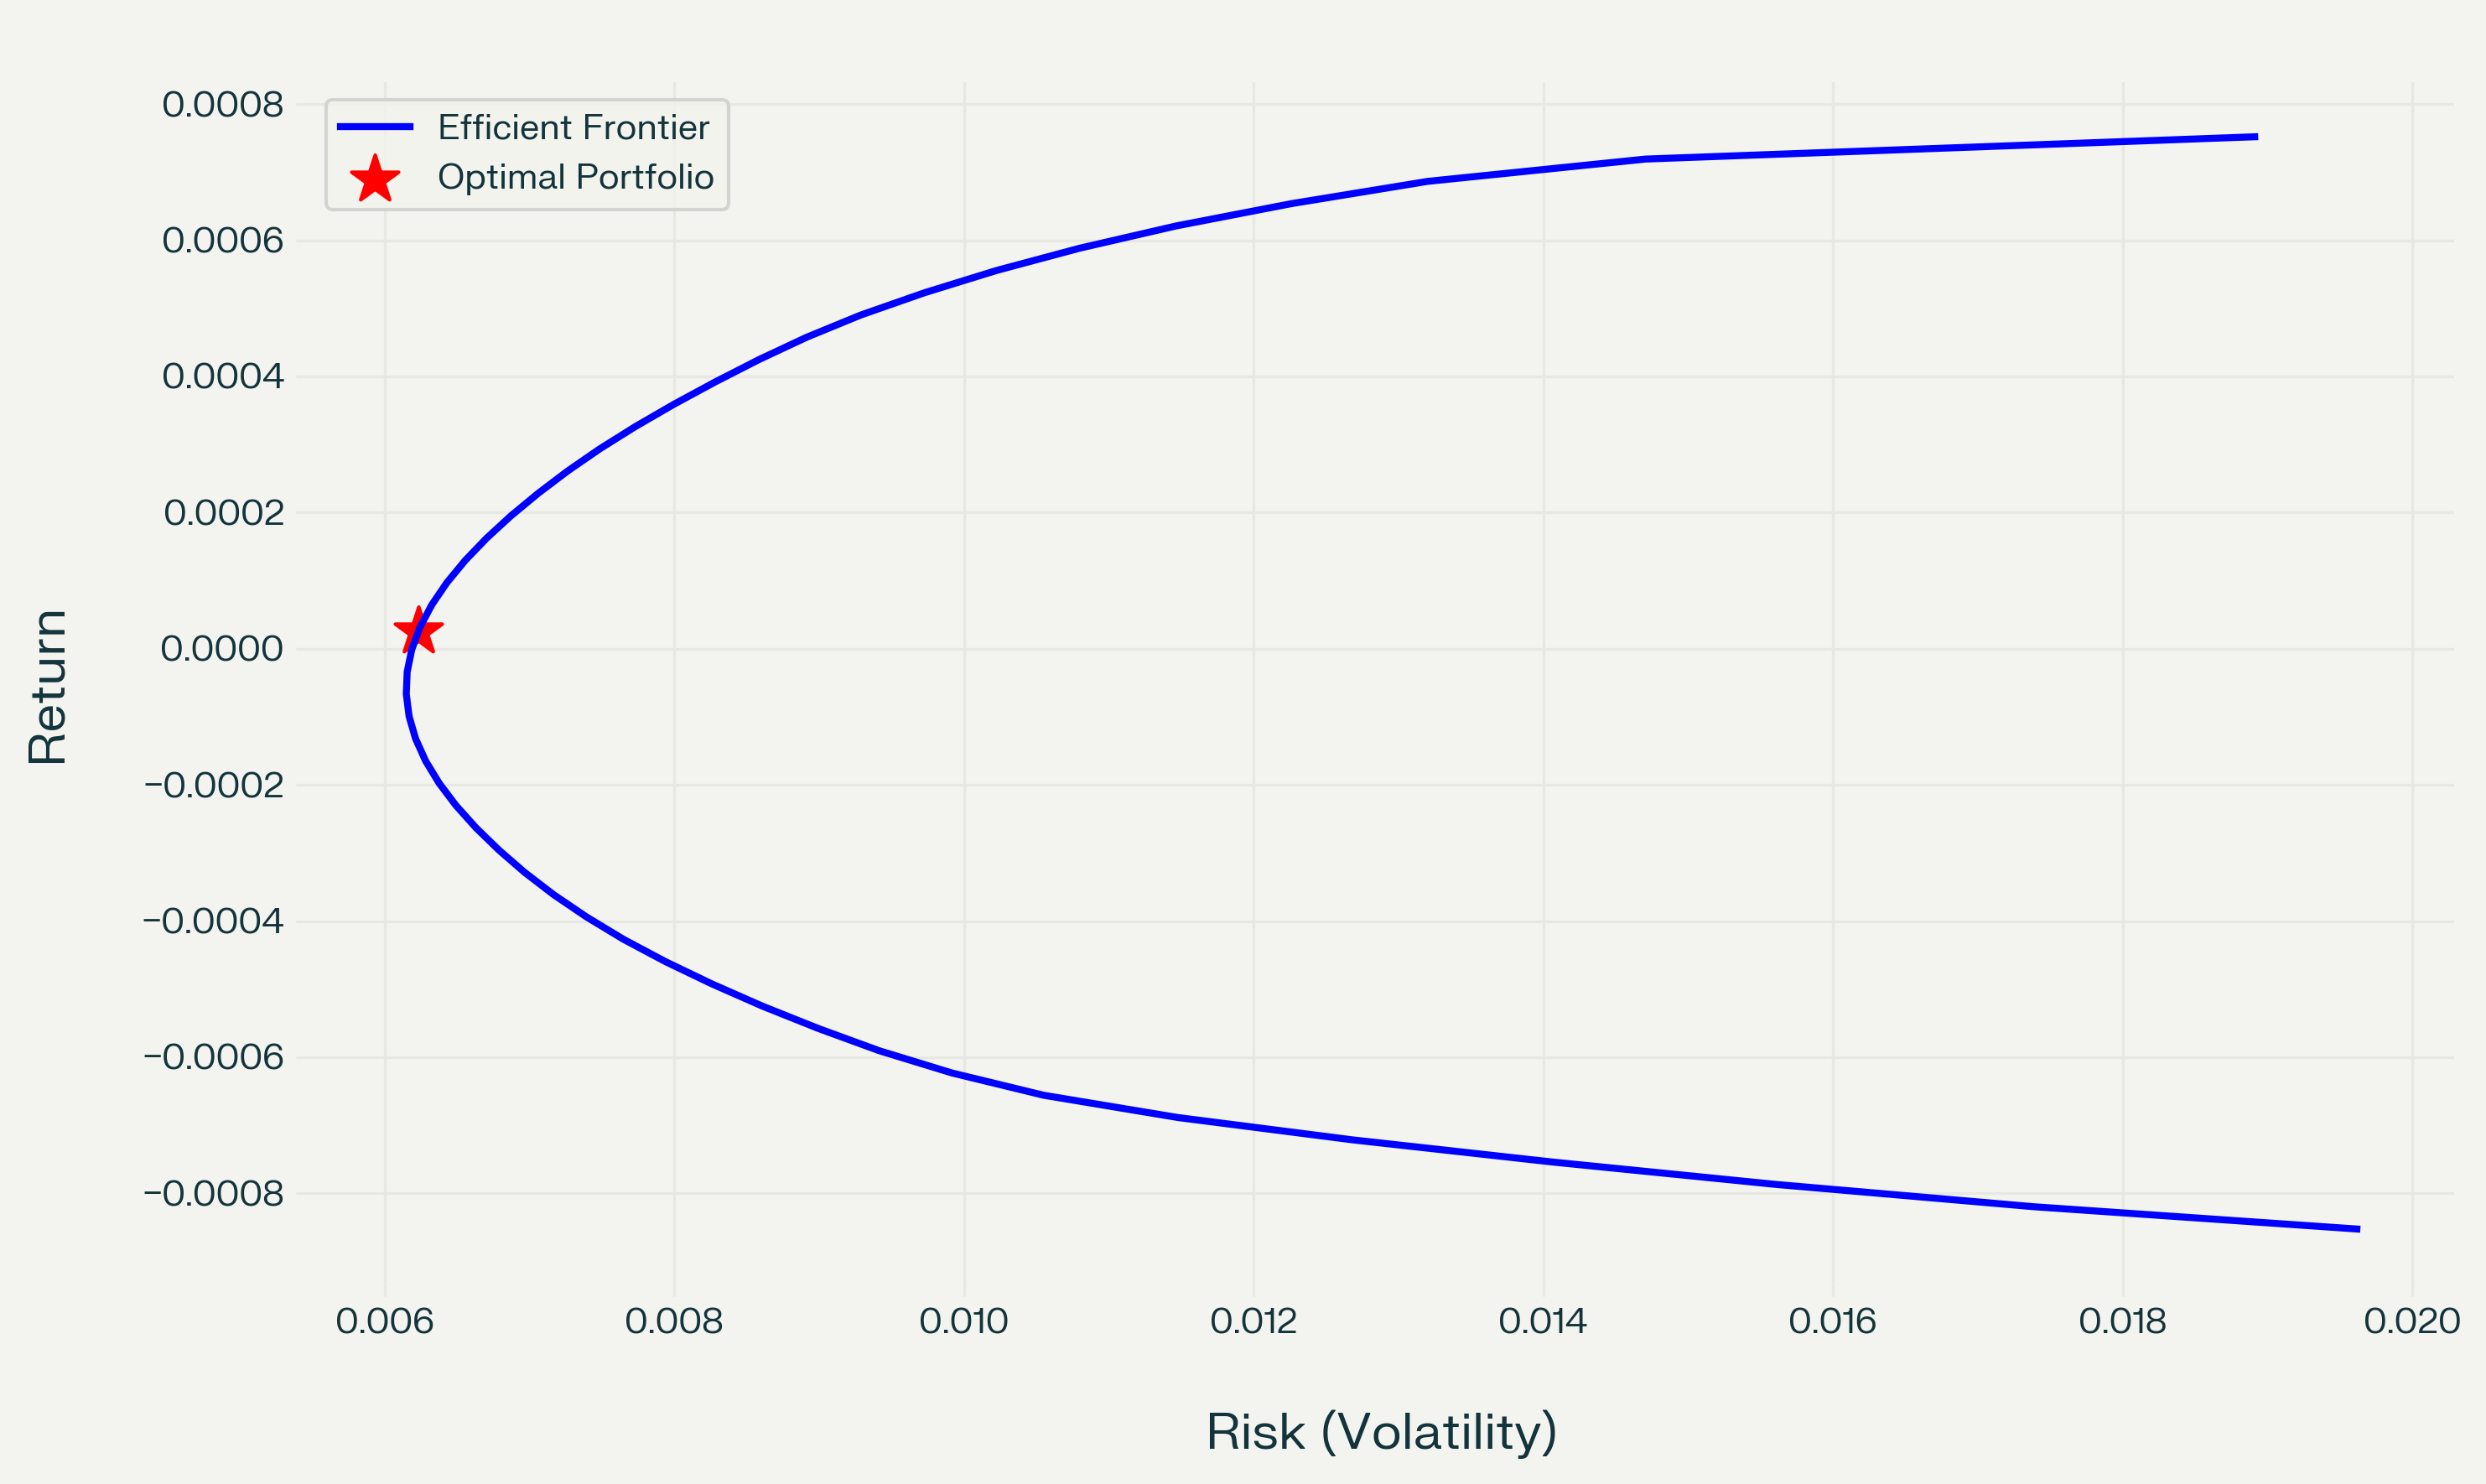

Here is a **simple Python code** that implements the classical Markowitz mean-variance portfolio optimization using your attached CSV dataset. This code follows the mathematical formulation you described:

- **Maximize:** $ \mu^T w - \lambda w^T \Sigma w $
- **Subject to:** $ \sum w_j = 1 $, $ w_j \geq 0 $



### **How it works:**
- Reads your CSV file and computes daily returns.
- Calculates the mean return vector ($\mu$) and covariance matrix ($\Sigma$).
- Sets up and solves the Markowitz mean-variance optimization problem for a given risk aversion parameter ($\lambda$).
- Prints the optimal weights, expected return, and risk.

